## 데이터분석 시작

In [16]:
import pandas as pd

# 1. 데이터 불러오기
df = pd.read_csv("./data/players_and_transf.csv")
# ML 뺀거
#df = df.drop(columns=['fee', 'name', 'club', 'league', 'season', 'position'])
#---------------------------------
# DL 뺀거 (+position 추가)
# df = df.drop(columns=['name', 'club','mins', 'yel', 'red', 'ps%', 'aerials_won', 'fouls', 'offsides_won', 'dribbled', 'blocks', 'own_goals', 'fouled',
#        'offsides', 'dispossed', 'bad_controls', 'crosses', 'long_passes', 'league', 'season', 'fee', 'position', 'motm', 'through_passes'])

selected_cols = [
    'age', 'apps', 'goals', 'assists', 'shots', 'rating', 'tackles',
    'interceptions', 'clearances', 'key_passes', 'dribblings', 'avg_passes',
    'club_position', 'traded'
]

df = df[selected_cols]

# apps 괄호 제거 및 '-' → 0 처리
df['apps'] = df['apps'].str.replace(r'\(.*\)', '', regex=True).str.strip()
df = df.replace('-', 0)
df = df.iloc[1::2]

In [17]:
df.shape

(35792, 14)

In [19]:
df = df.dropna()
df.isnull().sum()

age              0
apps             0
goals            0
assists          0
shots            0
rating           0
tackles          0
interceptions    0
clearances       0
key_passes       0
dribblings       0
avg_passes       0
club_position    0
traded           0
dtype: int64

In [20]:
df.shape

(35683, 14)

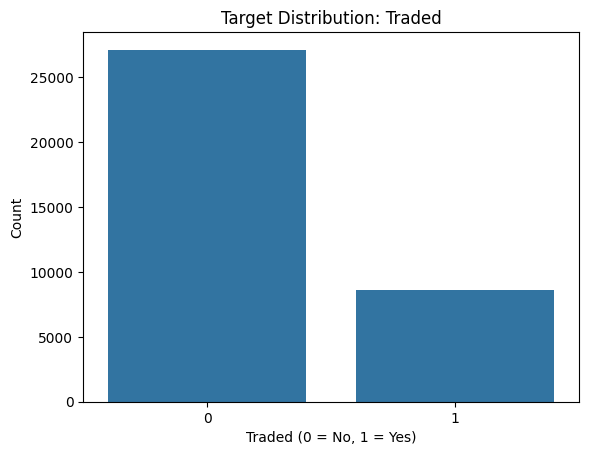

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# 타깃(=traded) 분포 확인
sns.countplot(x='traded', data=df)
plt.title("Target Distribution: Traded")
plt.xlabel("Traded (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.savefig("./data/타겟분포도.png", dpi=300)
plt.show()

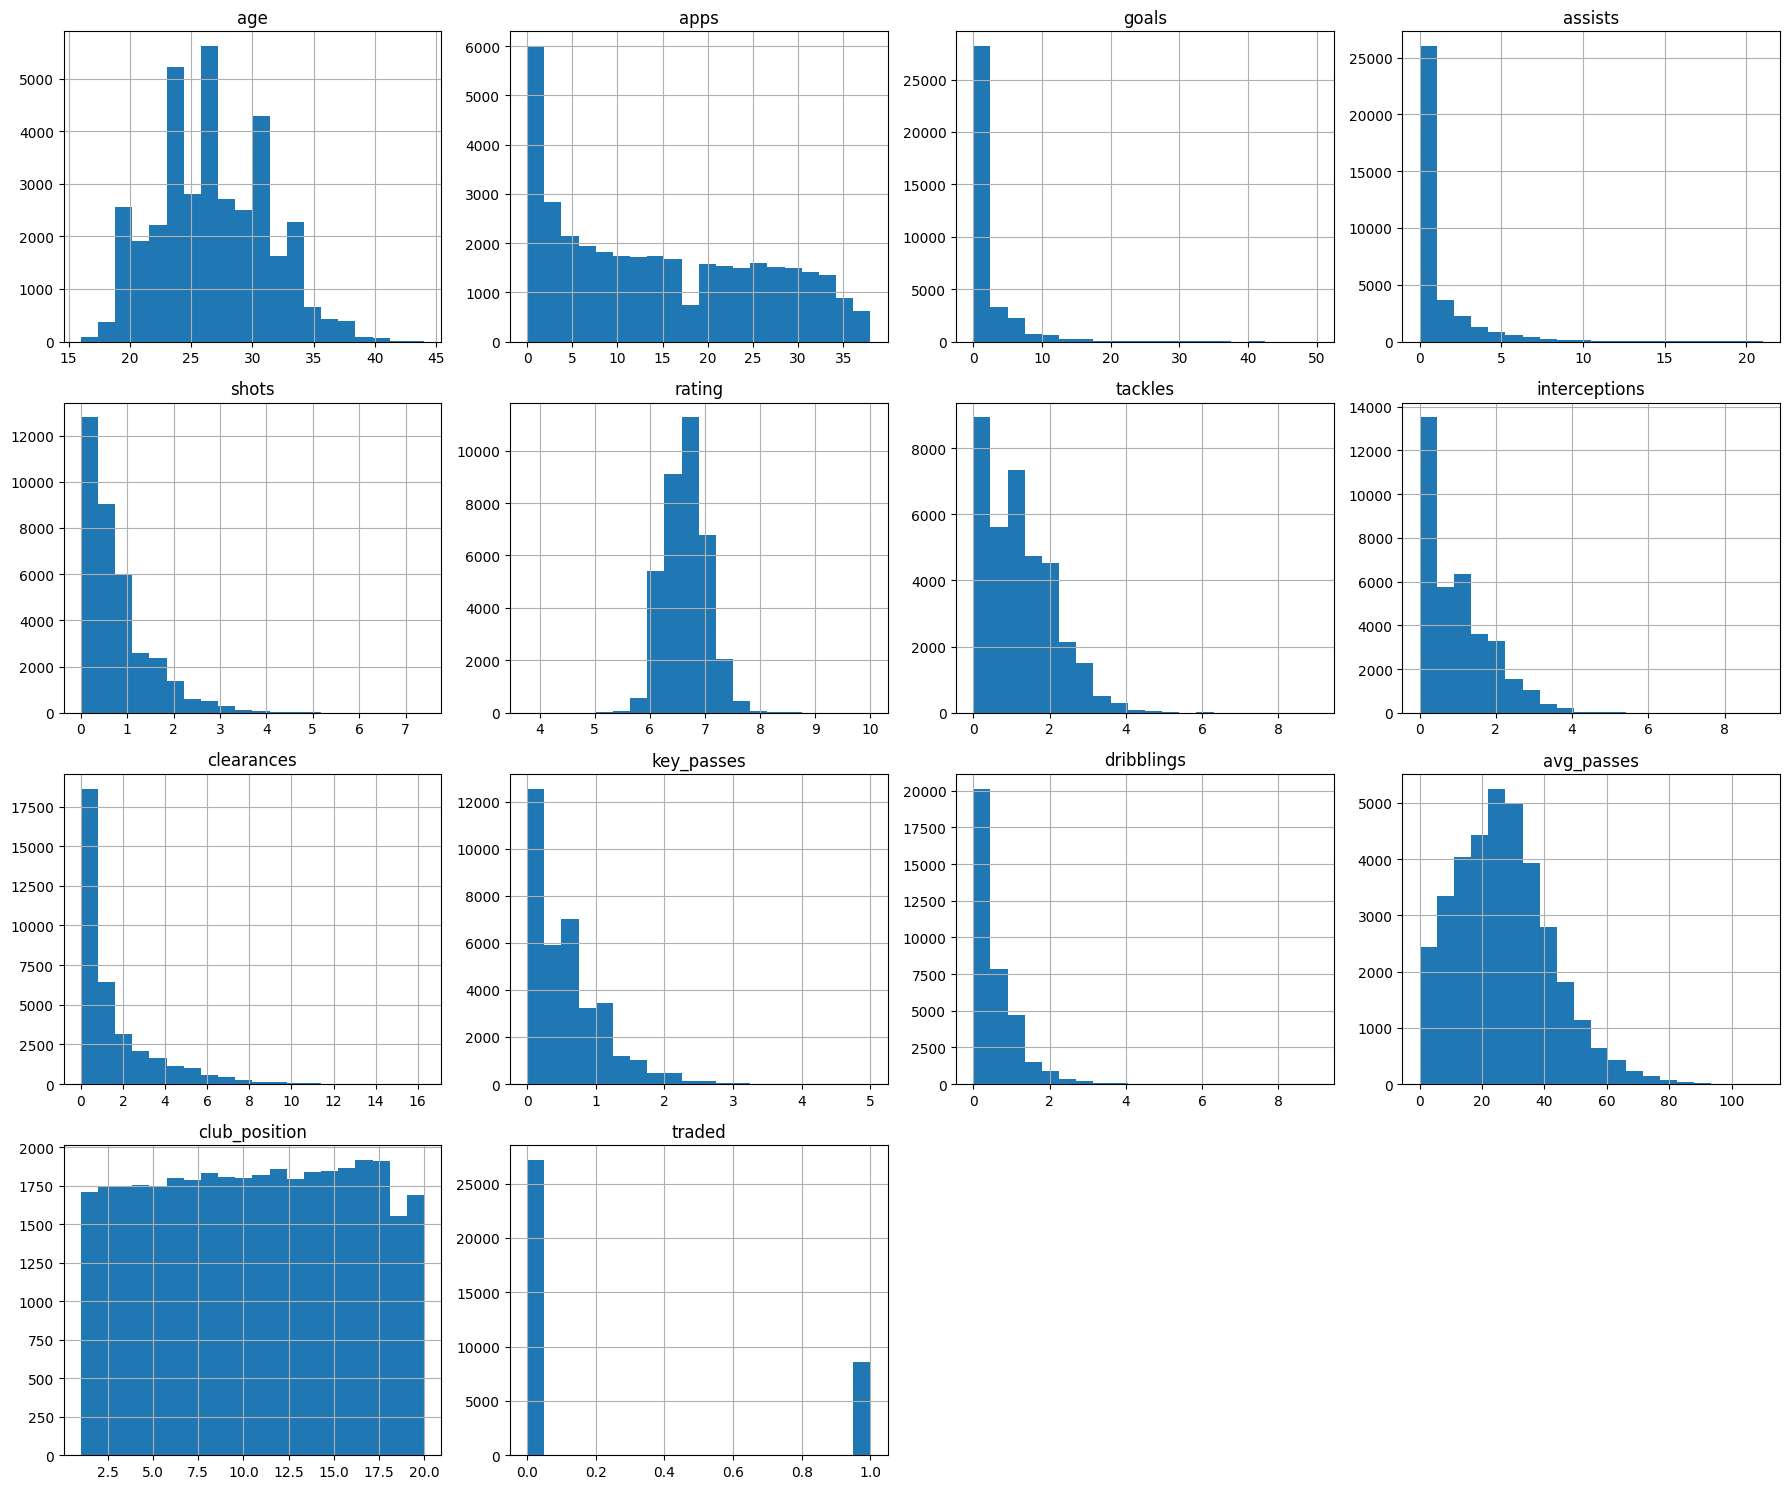

In [30]:
df = df.apply(pd.to_numeric, errors='coerce')
df.hist(bins=20, figsize=(18, 15))
plt.tight_layout()
plt.savefig("./data/히스토그램.png", dpi=300)
plt.show()

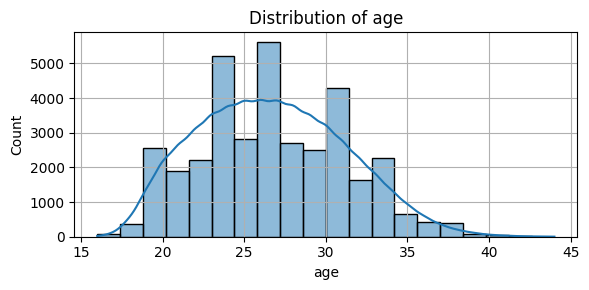

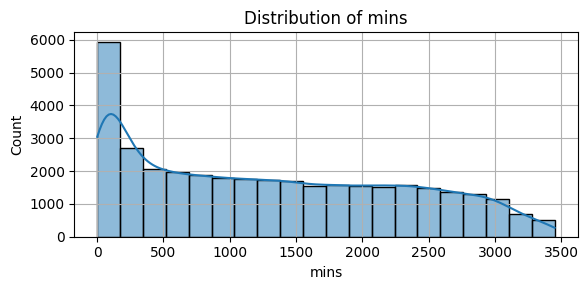

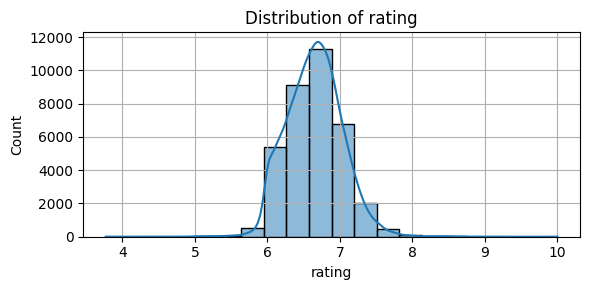

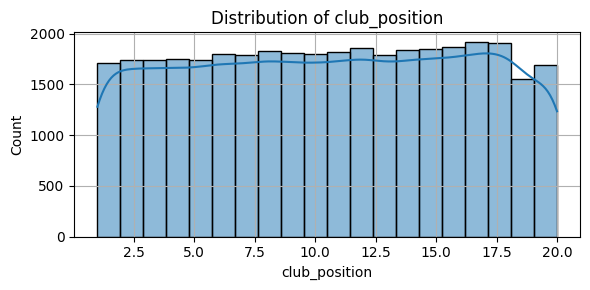

In [45]:
# 수치형 변수 자동 추출
numeric_cols = df.select_dtypes(include='number').columns.drop(['traded'])  # 타깃 제외

# 히스토그램과 밀도 그래프
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [10]:
# 이상치 탐색 (박스플롯)
for col in numeric_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

NameError: name 'numeric_cols' is not defined

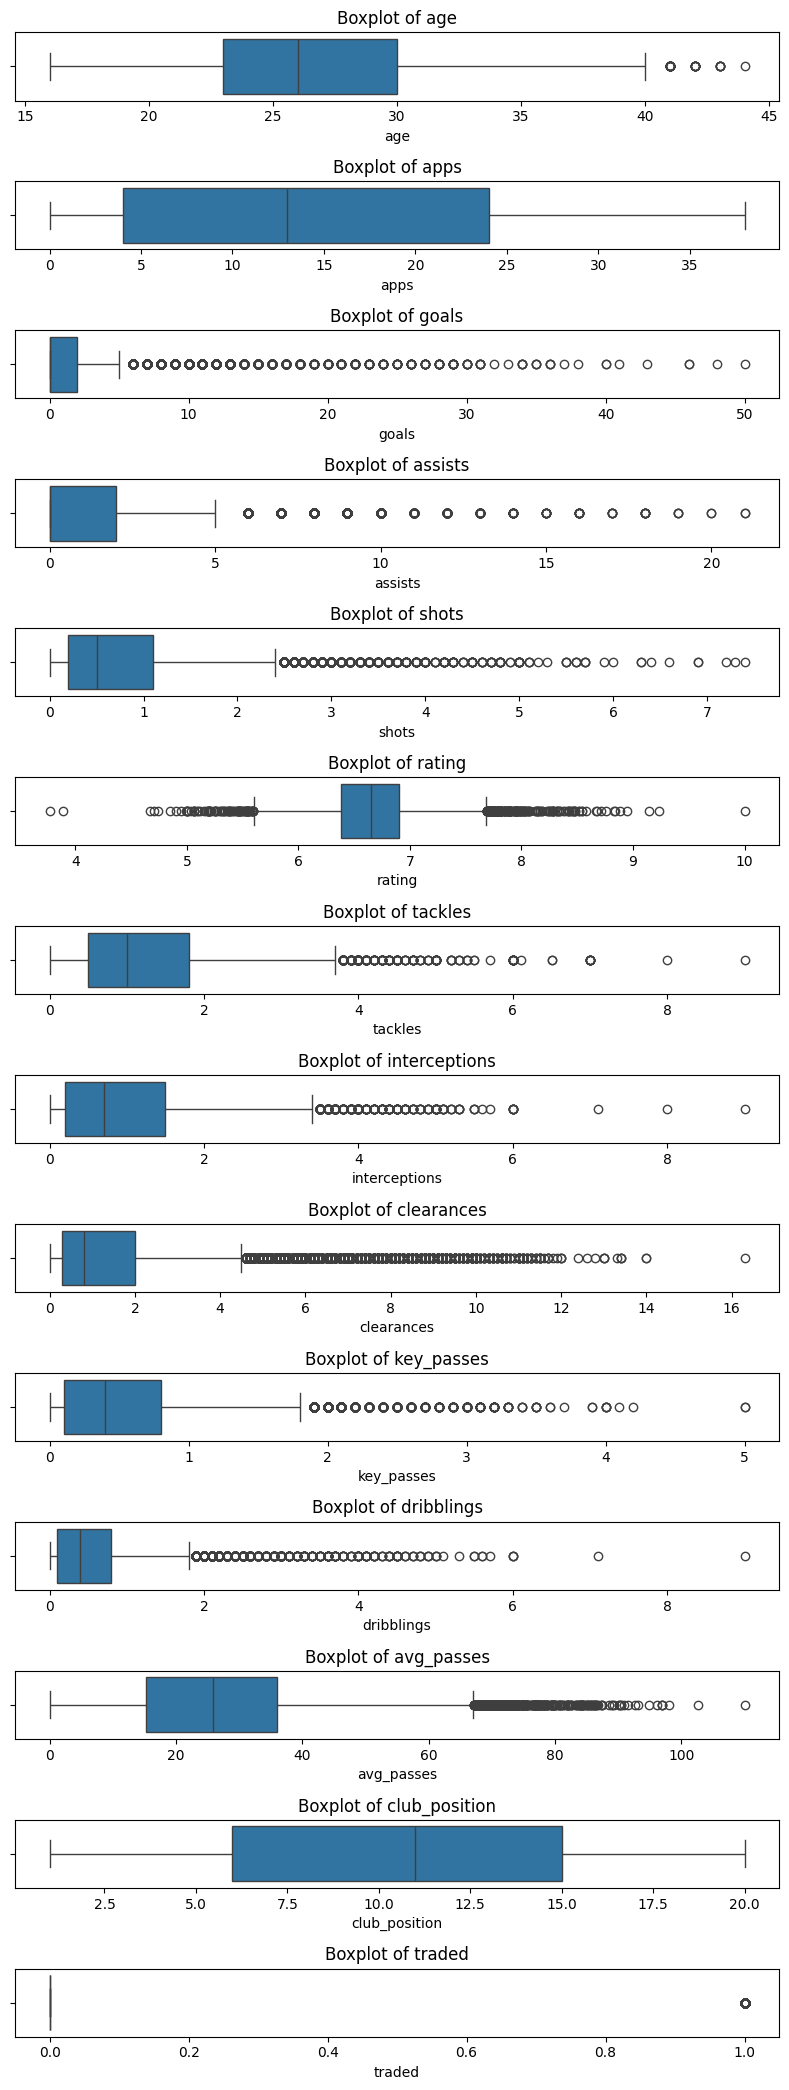

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include='number').columns.tolist()

fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(8, 1.5*len(numeric_cols)), sharex=False)

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.savefig("./data/박스플롯.png", dpi=300)
plt.show()

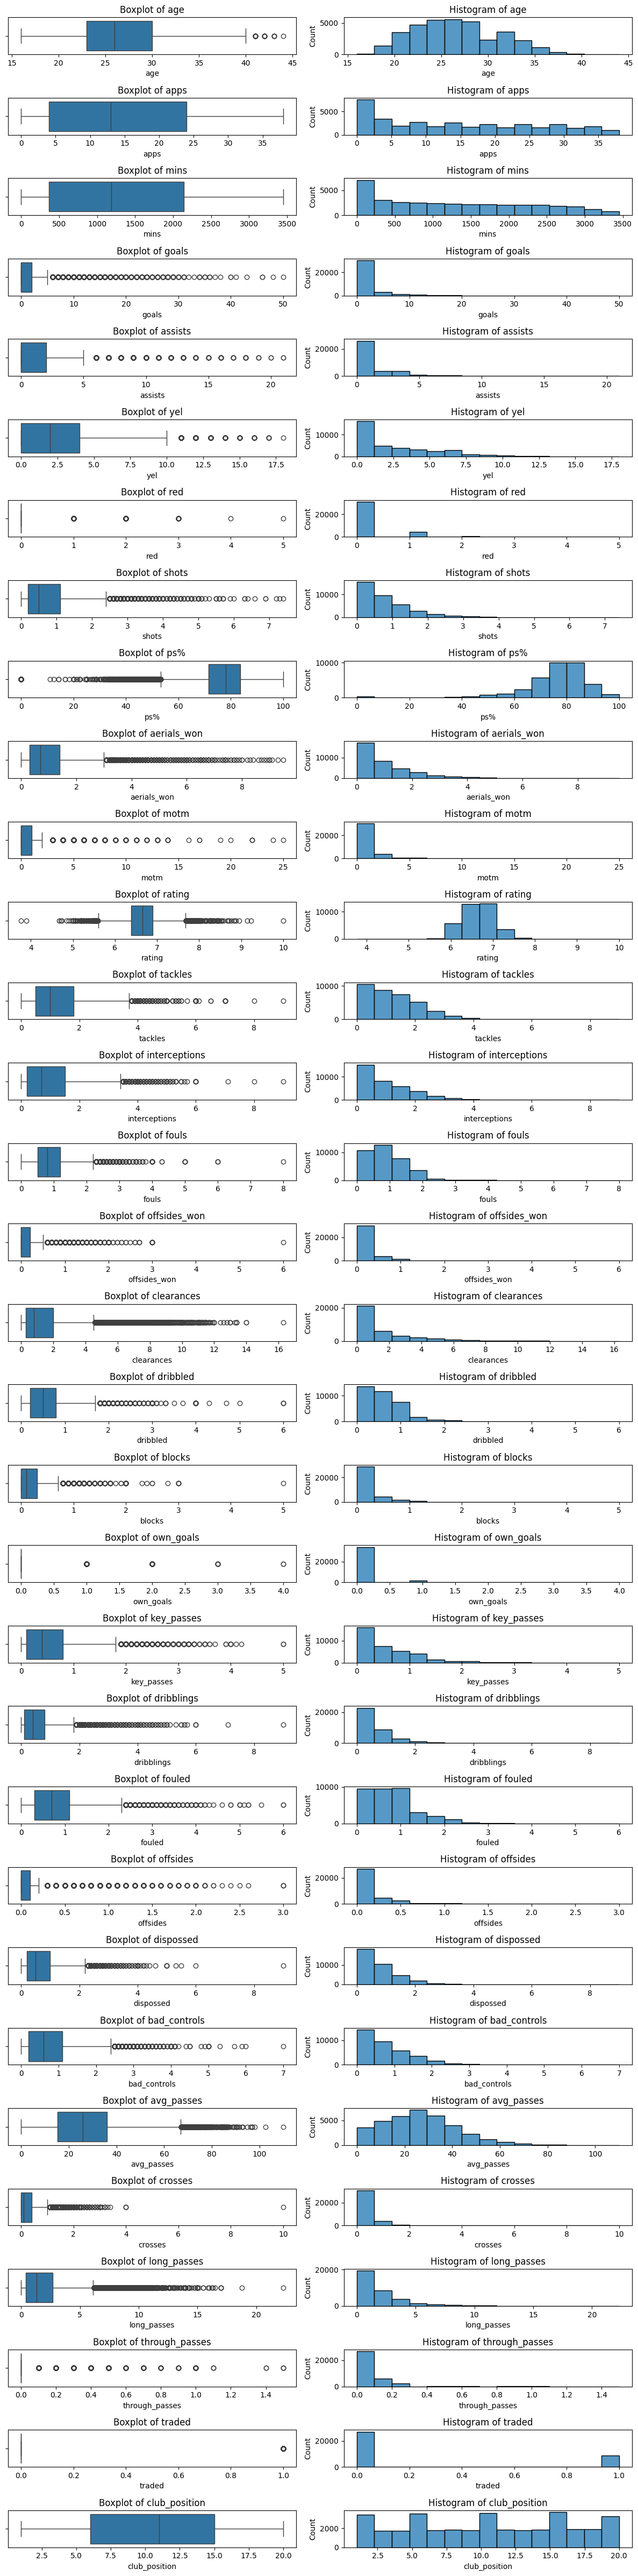

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# 숫자 컬럼 리스트 (라벨인코딩한 컬럼 포함)
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# boxplot subplot
fig, axes = plt.subplots(len(numeric_cols), 2, figsize=(12, 1.5*len(numeric_cols)))

for i, col in enumerate(numeric_cols):
    # Boxplot
    sns.boxplot(x=df[col], ax=axes[i, 0])
    axes[i, 0].set_title(f"Boxplot of {col}")
    
    # Histogram
    sns.histplot(df[col], bins=15, ax=axes[i, 1], kde=False)
    axes[i, 1].set_title(f"Histogram of {col}")

plt.tight_layout()
plt.show()

In [13]:
df_matrix = df.apply(pd.to_numeric, errors='coerce')

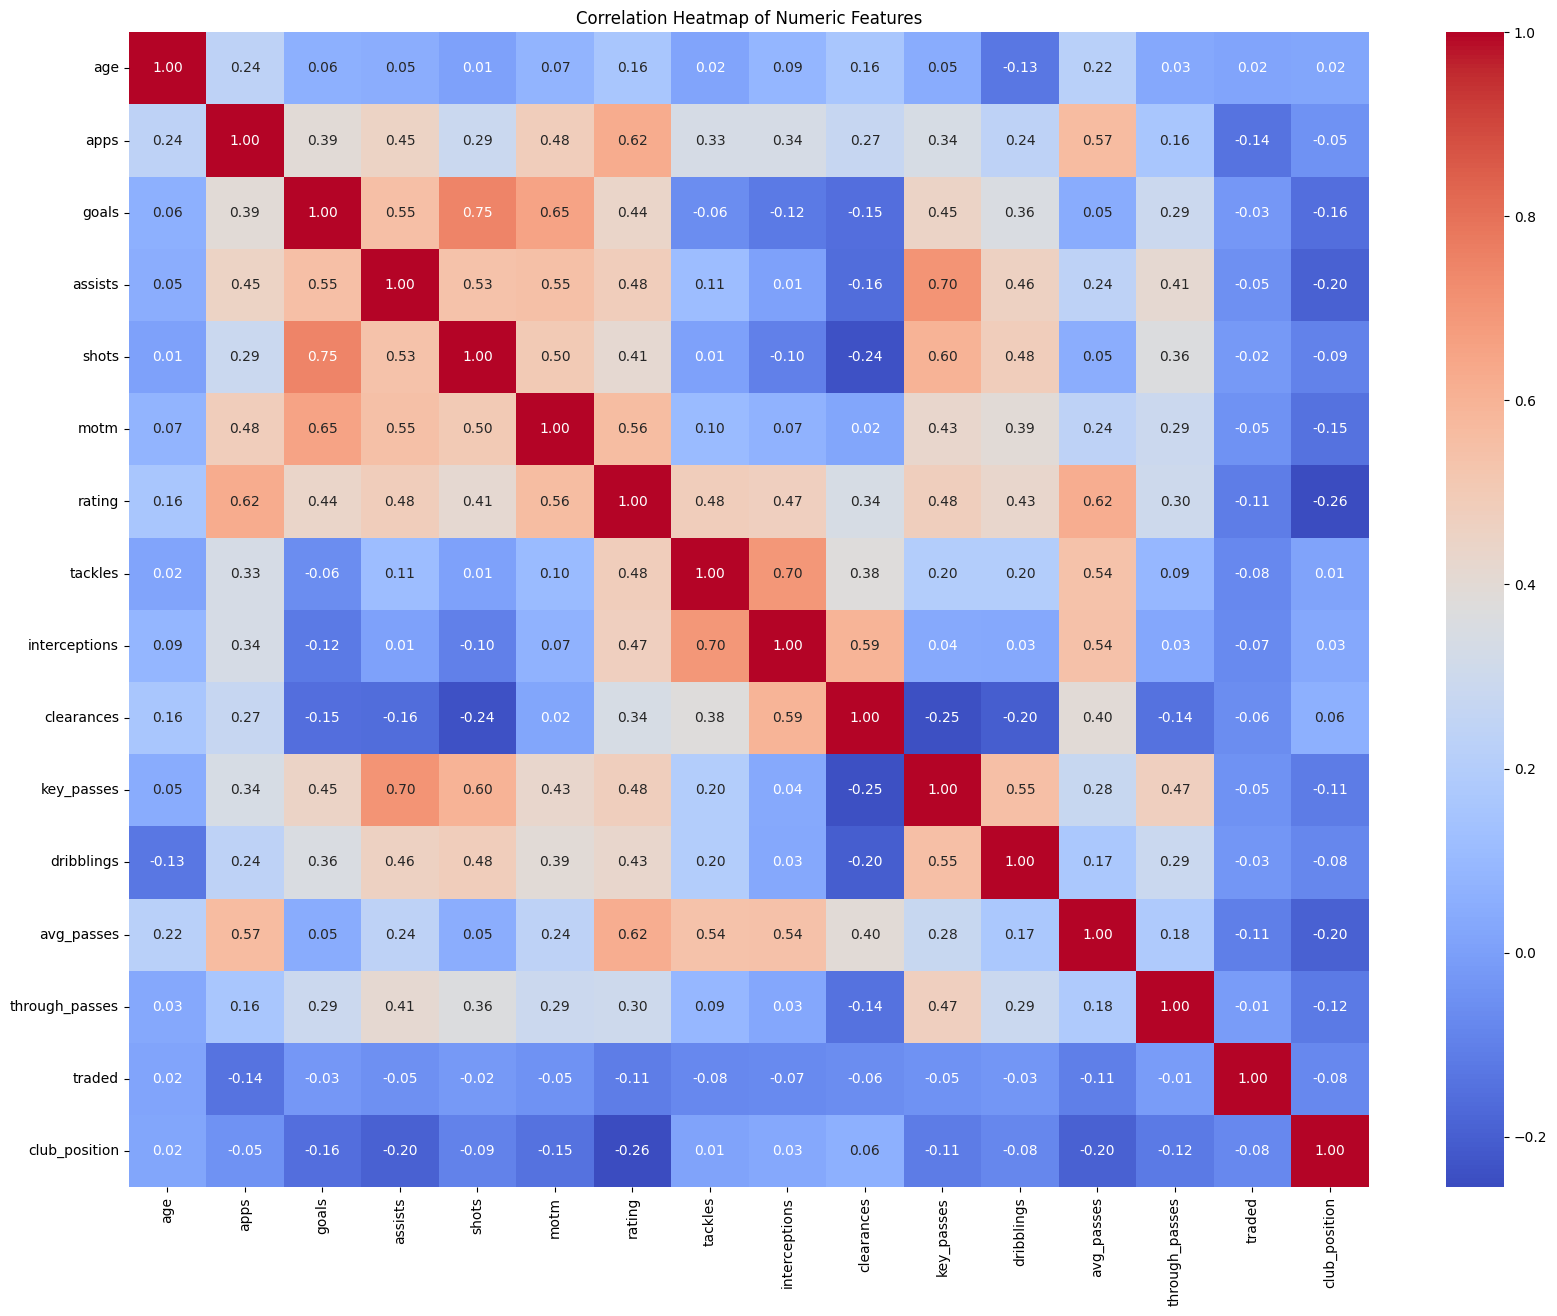

In [32]:
# 변수 간 상관관계 분석 (Heatmap)
plt.figure(figsize=(20, 15))
corr_matrix = df_matrix.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.savefig("./data/히트맵.png", dpi=300)
plt.show()

## 임시 확인용(머신러닝 scaler 없이)

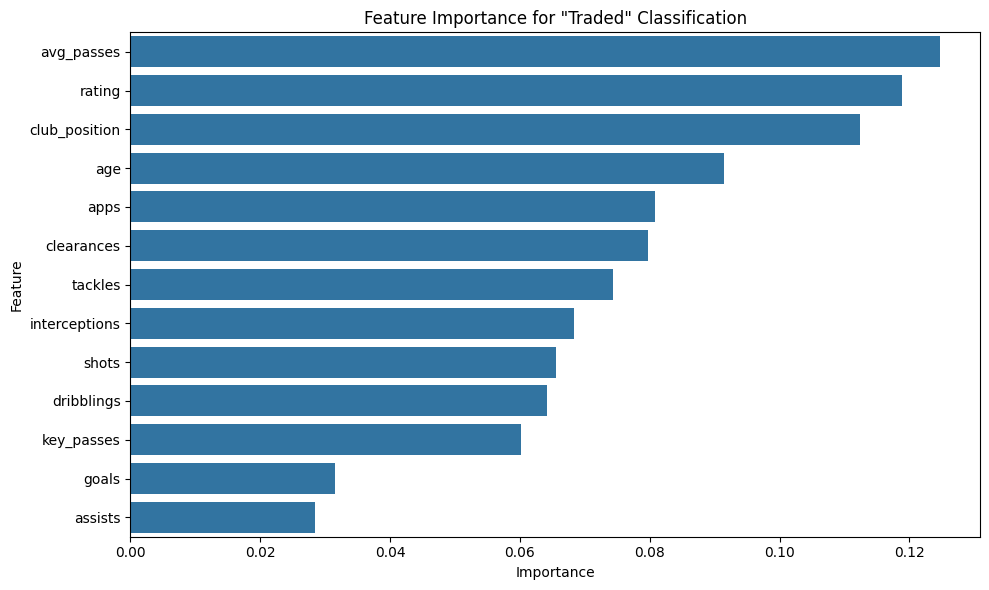

In [33]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로딩
# df = pd.read_csv("your_data.csv")  # 또는 pd.read_clipboard()로 붙여넣기
# 예시에서는 이미 DataFrame이 있다고 가정

# 목표 변수
target = 'traded'
X = df.drop(columns=[target])
y = df[target]

# 범주형 처리 (예: club_position이 숫자형이 아닌 경우)
if X['club_position'].dtype == 'object':
    X = pd.get_dummies(X)

# 필요 시 정규화 (랜덤포레스트에는 필수는 아님)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# 모델 훈련
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# 중요도 추출
importances = model.feature_importances_
features = X.columns

# 시각화
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance for "Traded" Classification')
plt.tight_layout()
plt.show()

### 머신러닝 (confusion matrix, roc, auc, Precision-Recall Curve, Threshold vs Recall/F1) 그래프
 - Precision-Recall Curve : Recall 변화 시 precision trade-off 확인
 - Threshold vs Recall/F1 : threshold 조정에 따른 성능 변화 확인

In [ ]:
## ML 성능지표 + importance

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, f1_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import LabelEncoder

# [2] Feature / Target 분리
X = df.drop(columns='traded')
y = df['traded']

# [3] Train/Test 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# [4] 모델 학습
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "MLP": MLPClassifier(max_iter=1000),
    "Voting Classifier": VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier()),
        ('svc', SVC(probability=True))
    ], voting='soft'),
    "XGBoost": XGBClassifier(),
}

# 5. 모델 평가 및 시각화
for model_name, model in models.items():
    print(f"Training {model_name}...")

    if model_name == 'XGBoost':
        model = XGBClassifier(enable_categorical=True)
    
    model.fit(X_train, y_train)
    
    # 예측
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)

    # 6. Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 4), dpi=300)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.savefig(f"./data/{model_name}_confusion_matrix.png", dpi=300)
    #plt.show()

    # 7. ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.figure(figsize=(6, 4), dpi=300)
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"./data/{model_name}_roc_curve.png", dpi=300)
    # plt.show()

    # 8. Precision-Recall Curve
    prec, rec, thresholds = precision_recall_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4), dpi=300)
    plt.plot(rec, prec)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve - {model_name}")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"./data/{model_name}_precision_recall_curve.png", dpi=300)
    # plt.show()

    # 9. Threshold vs F1 / Recall
    f1_scores = []
    recalls = []

    for threshold in thresholds:
        y_thresh = (y_proba >= threshold).astype(int)
        f1_scores.append(f1_score(y_test, y_thresh))
        recalls.append(recall_score(y_test, y_thresh))

    plt.figure(figsize=(6, 4), dpi=300)
    plt.plot(thresholds, f1_scores, label='F1 Score')
    plt.plot(thresholds, recalls, label='Recall')
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.title(f"Threshold vs F1 / Recall - {model_name}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"./data/{model_name}_threshold_f1_recall.png", dpi=300)
    # plt.show()

    # Feature Importance 시각화
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        features = X.columns
        importance_df = pd.DataFrame({
            "Feature": features,
            "Importance": importances
        }).sort_values(by="Importance", ascending=False)

        plt.figure(figsize=(8, 5), dpi=300)
        sns.barplot(x="Importance", y="Feature", data=importance_df)
        plt.title(f"Feature Importance - {model_name}")
        plt.tight_layout()
        plt.savefig(f"./data/{model_name}_feature_importance.png", dpi=300)
        plt.close()

    elif model_name == "Logistic Regression":
        coef = model.coef_[0]
        features = X.columns
        importance_df = pd.DataFrame({
            "Feature": features,
            "Importance": np.abs(coef)
        }).sort_values(by="Importance", ascending=False)

        plt.figure(figsize=(8, 5), dpi=300)
        sns.barplot(x="Importance", y="Feature", data=importance_df)
        plt.title(f"Feature Coefficients (Abs) - {model_name}")
        plt.tight_layout()
        plt.savefig(f"./data/{model_name}_feature_importance.png", dpi=300)
        plt.close()

        

Training Logistic Regression...
Training KNN...
Training Decision Tree...
Training Random Forest...
Training SVM...
Training MLP...
Training Voting Classifier...


In [ ]:
## 실제 머신러닝 (가공전) 

import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

# ------------------------------------
# 1. 데이터 로딩 및 전처리
# ------------------------------------
x_train = pd.read_csv("./data/x_train.csv")
y_train = pd.read_csv("./data/y_train.csv").squeeze().astype(int)

# 사용하지 않을 피처 제거
x_train.drop(columns=['motm', 'position', 'through_passes'], inplace=True)

# 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_train)

# SMOTE 적용
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_train)

# 학습/검증 분할
X_train, X_val, y_train_split, y_val = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# 피처 이름
feature_names = x_train.columns

# ------------------------------------
# 2. 모델 정의
# ------------------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
}

best_model = None
best_score = 0
best_name = ""

# ------------------------------------
# 3. 학습 및 평가 + Feature Importance 시각화
# ------------------------------------
for model_name, model in models.items():
    print(f"\n🔍 Training {model_name}...")
    model.fit(X_train, y_train_split)
    y_pred = model.predict(X_val)

    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    print(f"✅ Accuracy: {acc:.4f}")
    print(f"✅ F1 Score: {f1:.4f}")
    print(classification_report(y_val, y_pred, digits=4))

    # 최고 성능 모델 추적
    if f1 > best_score:
        best_model = model
        best_score = f1
        best_name = model_name

    # -----------------------------
    # Feature Importance 저장
    # -----------------------------
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        importance_df = pd.DataFrame({
            "Feature": feature_names,
            "Importance": importances
        }).sort_values(by="Importance", ascending=False)

        plt.figure(figsize=(8, 5), dpi=300)
        sns.barplot(x="Importance", y="Feature", data=importance_df)
        plt.title(f"Feature Importance - {model_name}")
        plt.tight_layout()
        plt.savefig(f"./data/{model_name}_feature_importance.png", dpi=300)
        plt.close()

    elif model_name == "Logistic Regression":
        coef = model.coef_[0]
        importance_df = pd.DataFrame({
            "Feature": feature_names,
            "Importance": np.abs(coef)
        }).sort_values(by="Importance", ascending=False)

        plt.figure(figsize=(8, 5), dpi=300)
        sns.barplot(x="Importance", y="Feature", data=importance_df)
        plt.title(f"Feature Coefficients (Abs) - {model_name}")
        plt.tight_layout()
        plt.savefig(f"./data/{model_name}_feature_importance.png", dpi=300)
        plt.close()



🔍 Training Logistic Regression...
✅ Accuracy: 0.5894
✅ F1 Score: 0.5898
              precision    recall  f1-score   support

           0     0.5896    0.5883    0.5890      4338
           1     0.5891    0.5905    0.5898      4337

    accuracy                         0.5894      8675
   macro avg     0.5894    0.5894    0.5894      8675
weighted avg     0.5894    0.5894    0.5894      8675


🔍 Training Random Forest...
✅ Accuracy: 0.8609
✅ F1 Score: 0.8542
              precision    recall  f1-score   support

           0     0.8308    0.9064    0.8669      4338
           1     0.8970    0.8153    0.8542      4337

    accuracy                         0.8609      8675
   macro avg     0.8639    0.8609    0.8606      8675
weighted avg     0.8639    0.8609    0.8606      8675


🔍 Training XGBoost...
✅ Accuracy: 0.8315
✅ F1 Score: 0.8127
              precision    recall  f1-score   support

           0     0.7761    0.9318    0.8468      4338
           1     0.9146    0.7312   

/home/mc/miniconda3/envs/pandas/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:20:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
## 머신러닝 성능검사

import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report, confusion_matrix,
    roc_curve, roc_auc_score, precision_recall_curve, recall_score
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

# ------------------------------------
# 1. 데이터 로딩 및 전처리
# ------------------------------------
x_train = pd.read_csv("./data/x.csv")
y_train = pd.read_csv("./data/y.csv").squeeze().astype(int)

# 사용하지 않을 피처 제거
for col in ['motm', 'position', 'through_passes']:
    if col in x_train.columns:
        x_train.drop(columns=col, inplace=True)

# 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_train)

# SMOTE 적용
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_train)

# 학습/검증 분할
X_train, X_val, y_train_split, y_val = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# 피처 이름
feature_names = x_train.columns

# ------------------------------------
# 2. 모델 정의
# ------------------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
}

best_model = None
best_score = 0
best_name = ""

# ------------------------------------
# 3. 학습 및 평가 + 시각화
# ------------------------------------
for model_name, model in models.items():
    print(f"\n🔍 Training {model_name}...")

    model.fit(X_train, y_train_split)
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1]

    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    print(f"✅ Accuracy: {acc:.4f}")
    print(f"✅ F1 Score: {f1:.4f}")
    print(classification_report(y_val, y_pred, digits=4))

    # 성능이 가장 좋은 모델 저장
    if f1 > best_score:
        best_model = model
        best_score = f1
        best_name = model_name

    # -----------------------------
    # [1] Confusion Matrix
    # -----------------------------
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(4, 4), dpi=300)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.savefig(f"./data/{model_name}_confusion_matrix.png")
    plt.close()

    # -----------------------------
    # [2] ROC Curve
    # -----------------------------
    fpr, tpr, _ = roc_curve(y_val, y_proba)
    auc = roc_auc_score(y_val, y_proba)
    plt.figure(figsize=(6, 4), dpi=300)
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"./data/{model_name}_roc_curve.png")
    plt.close()

    # -----------------------------
    # [3] Precision-Recall Curve
    # -----------------------------
    prec, rec, thresholds = precision_recall_curve(y_val, y_proba)
    plt.figure(figsize=(6, 4), dpi=300)
    plt.plot(rec, prec)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve - {model_name}")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"./data/{model_name}_precision_recall_curve.png")
    plt.close()

    # -----------------------------
    # [4] Threshold vs F1 / Recall
    # -----------------------------
    f1_scores = []
    recalls = []

    for t in thresholds:
        y_thresh = (y_proba >= t).astype(int)
        f1_scores.append(f1_score(y_val, y_thresh))
        recalls.append(recall_score(y_val, y_thresh))

    plt.figure(figsize=(6, 4), dpi=300)
    plt.plot(thresholds, f1_scores, label="F1 Score")
    plt.plot(thresholds, recalls, label="Recall")
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.title(f"Threshold vs F1 / Recall - {model_name}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"./data/{model_name}_threshold_f1_recall.png")
    plt.close()


🔍 Training Logistic Regression...
✅ Accuracy: 0.5885
✅ F1 Score: 0.5899
              precision    recall  f1-score   support

           0     0.5917    0.5826    0.5871      5445
           1     0.5854    0.5945    0.5899      5398

    accuracy                         0.5885     10843
   macro avg     0.5885    0.5885    0.5885     10843
weighted avg     0.5885    0.5885    0.5885     10843


🔍 Training Random Forest...
✅ Accuracy: 0.8555
✅ F1 Score: 0.8486
              precision    recall  f1-score   support

           0     0.8290    0.8973    0.8618      5445
           1     0.8870    0.8133    0.8486      5398

    accuracy                         0.8555     10843
   macro avg     0.8580    0.8553    0.8552     10843
weighted avg     0.8579    0.8555    0.8552     10843


🔍 Training XGBoost...


/home/mc/miniconda3/envs/pandas/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:19:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.8310
✅ F1 Score: 0.8122
              precision    recall  f1-score   support

           0     0.7786    0.9273    0.8464      5445
           1     0.9091    0.7340    0.8122      5398

    accuracy                         0.8310     10843
   macro avg     0.8438    0.8306    0.8293     10843
weighted avg     0.8436    0.8310    0.8294     10843



In [ ]:
## 딥러닝용 성능검사
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


# -----------------------
# Dataset 정의
# -----------------------
class TabularDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y.values if isinstance(y, pd.Series) else y, dtype=torch.float32).unsqueeze(1)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

class ResidualBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels, downsample=False):
        super().__init__()
        stride = 2 if downsample else 1
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1, stride=stride)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.downsample = downsample
        self.proj = (
            nn.Conv1d(in_channels, out_channels, 1, stride=stride) if downsample or in_channels!=out_channels else nn.Identity()
        )
    def forward(self, x):
        identity = self.proj(x)
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += identity
        return F.relu(out)

class ImprovedCNN1DClassifier(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.initial_bn = nn.BatchNorm1d(input_dim)
        self.conv = nn.Sequential(
            nn.Conv1d(1, 64, 3, padding=1),
            nn.BatchNorm1d(64),
            nn.ReLU(inplace=True),
            ResidualBlock1D(64, 128, downsample=True),
            ResidualBlock1D(128, 256, downsample=True),
            nn.AdaptiveMaxPool1d(1),
            nn.Flatten(),
        )

        self.mlp = nn.Sequential(
            nn.Linear(256, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 1)
        )
    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.conv(x)
        return self.mlp(x)

# -----------------------
# 데이터 로드
# -----------------------
x_train = pd.read_csv("./x.csv")
y_train = pd.read_csv("./y.csv")

# 클래스 정수형 확인
y_train = y_train.squeeze()
y_train = y_train.astype(int)

# 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_train)

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_train)

# 훈련/검증 분리
X_train, X_val, y_train_split, y_val = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=42)

train_dataset = TabularDataset(X_train, y_train_split)
val_dataset = TabularDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True) #->64->128
val_loader = DataLoader(val_dataset, batch_size=256) # 64->128

# -----------------------
# 모델 설정
# -----------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ImprovedCNN1DClassifier(input_dim=x_train.shape[1]).to(device)

# pos_weight 계산
labels = np.unique(y_train_split)
class_weights = compute_class_weight(class_weight='balanced', classes=labels, y=y_train_split)
weight_dict = dict(zip(labels, class_weights))
pos_weight = torch.tensor([weight_dict[1] / weight_dict[0]]).to(device)

criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)  ##4->3

train_losses =[]
val_losses =[]

# -----------------------
# 학습
# -----------------------
num_epochs = 100
for epoch in range(1, num_epochs + 1):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        logits = model(X_batch)
        loss = criterion(logits, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # 검증 손실
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            logits = model(X_batch)
            val_loss += criterion(logits, y_batch).item()
    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    print(f"[Epoch {epoch}] Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

# -----------------------
# 평가
# -----------------------
model.eval()
all_probs, all_targets = [], []
thresholds = []
recalls_0 = []
recalls_1 = []
accs = []
with torch.no_grad():
    for X_batch, y_batch in val_loader:
        X_batch = X_batch.to(device)
        logits = model(X_batch)
        probs = torch.sigmoid(logits).cpu().numpy()
        all_probs.extend(probs)
        all_targets.extend(y_batch.numpy())

all_probs = np.array(all_probs).flatten()
all_targets = np.array(all_targets).flatten()

# Threshold 튜닝
best_f1, best_thresh = 0, 0
for t in np.arange(0.1, 0.9, 0.01):
    preds = (all_probs > t).astype(int)
    f1 = f1_score(all_targets, preds)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

# 최종 예측
final_preds = (all_probs > best_thresh).astype(int)
acc = accuracy_score(all_targets, final_preds)
report = classification_report(all_targets, final_preds, digits=4)

print(f"\n✅ Best Threshold: {best_thresh:.2f}")
print(f"✅ Accuracy       : {acc:.4f}")
print(f"✅ F1 Score       : {best_f1:.4f}")
print(report)

from sklearn.metrics import (
    confusion_matrix, roc_curve, roc_auc_score,
    precision_recall_curve, recall_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs("./data", exist_ok=True)
model_name = "DeepLearning"

# Confusion Matrix
cm = confusion_matrix(all_targets, final_preds)
plt.figure(figsize=(4, 4), dpi=300)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix - {model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig(f"./data/{model_name}_confusion_matrix.png")
plt.close()

# ROC Curve
fpr, tpr, _ = roc_curve(all_targets, all_probs)
auc = roc_auc_score(all_targets, all_probs)
plt.figure(figsize=(6, 4), dpi=300)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve - {model_name}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(f"./data/{model_name}_roc_curve.png")
plt.close()

# Precision-Recall Curve
prec, rec, thresholds_pr = precision_recall_curve(all_targets, all_probs)
plt.figure(figsize=(6, 4), dpi=300)
plt.plot(rec, prec)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall Curve - {model_name}")
plt.grid(True)
plt.tight_layout()
plt.savefig(f"./data/{model_name}_precision_recall_curve.png")
plt.close()

# Threshold vs F1 / Recall
f1_scores = []
recalls = []
for t in thresholds_pr:
    y_thresh = (all_probs >= t).astype(int)
    f1_scores.append(f1_score(all_targets, y_thresh))
    recalls.append(recall_score(all_targets, y_thresh))

plt.figure(figsize=(6, 4), dpi=300)
plt.plot(thresholds_pr, f1_scores, label="F1 Score")
plt.plot(thresholds_pr, recalls, label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title(f"Threshold vs F1 / Recall - {model_name}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(f"./data/{model_name}_threshold_f1_recall.png")
plt.close()

In [ ]:
## 딥러닝 최종... 빠진 부분이 뭘까....
## 딥러닝용
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


# -----------------------
# Dataset 정의
# -----------------------
class TabularDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y.values if isinstance(y, pd.Series) else y, dtype=torch.float32).unsqueeze(1)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

class ResidualBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels, downsample=False):
        super().__init__()
        stride = 2 if downsample else 1
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1, stride=stride)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.downsample = downsample
        self.proj = (
            nn.Conv1d(in_channels, out_channels, 1, stride=stride) if downsample or in_channels!=out_channels else nn.Identity()
        )
    def forward(self, x):
        identity = self.proj(x)
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += identity
        return F.relu(out)

class ImprovedCNN1DClassifier(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.initial_bn = nn.BatchNorm1d(input_dim)
        self.conv = nn.Sequential(
            nn.Conv1d(1, 64, 3, padding=1),
            nn.BatchNorm1d(64),
            nn.ReLU(inplace=True),
            ResidualBlock1D(64, 128, downsample=True),
            ResidualBlock1D(128, 256, downsample=True),
            nn.AdaptiveMaxPool1d(1),
            nn.Flatten(),
        )

        self.mlp = nn.Sequential(
            nn.Linear(256, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 1)
        )
    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.conv(x)
        return self.mlp(x)

# -----------------------
# 데이터 로드
# -----------------------
x_train = pd.read_csv("./2nd_project/data/x.csv")
y_train = pd.read_csv("./2nd_project/data/y.csv")

# 클래스 정수형 확인
y_train = y_train.squeeze()
y_train = y_train.astype(int)

# 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_train)

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_train)

# 훈련/검증 분리
X_train, X_val, y_train_split, y_val = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=42)

train_dataset = TabularDataset(X_train, y_train_split)
val_dataset = TabularDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True) #->64->128
val_loader = DataLoader(val_dataset, batch_size=256) # 64->128

# -----------------------
# 모델 설정
# -----------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ImprovedCNN1DClassifier(input_dim=x_train.shape[1]).to(device)

# pos_weight 계산
labels = np.unique(y_train_split)
class_weights = compute_class_weight(class_weight='balanced', classes=labels, y=y_train_split)
weight_dict = dict(zip(labels, class_weights))
pos_weight = torch.tensor([weight_dict[1] / weight_dict[0]]).to(device)

criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)  ##4->3

train_losses =[]
val_losses =[]

# -----------------------
# 학습
# -----------------------
num_epochs = 100
for epoch in range(1, num_epochs + 1):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        logits = model(X_batch)
        loss = criterion(logits, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # 검증 손실
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            logits = model(X_batch)
            val_loss += criterion(logits, y_batch).item()
    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    print(f"[Epoch {epoch}] Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

# -----------------------
# 평가
# -----------------------
model.eval()
all_probs, all_targets = [], []
thresholds = []
recalls_0 = []
recalls_1 = []
accs = []
with torch.no_grad():
    for X_batch, y_batch in val_loader:
        X_batch = X_batch.to(device)
        logits = model(X_batch)
        probs = torch.sigmoid(logits).cpu().numpy()
        all_probs.extend(probs)
        all_targets.extend(y_batch.numpy())

all_probs = np.array(all_probs).flatten()
all_targets = np.array(all_targets).flatten()

# Threshold 튜닝
best_f1, best_thresh = 0, 0
for t in np.arange(0.1, 0.9, 0.01):
    preds = (all_probs > t).astype(int)
    f1 = f1_score(all_targets, preds)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

# 최종 예측
final_preds = (all_probs > best_thresh).astype(int)
acc = accuracy_score(all_targets, final_preds)
report = classification_report(all_targets, final_preds, digits=4)

print(f"\n✅ Best Threshold: {best_thresh:.2f}")
print(f"✅ Accuracy       : {acc:.4f}")
print(f"✅ F1 Score       : {best_f1:.4f}")
print(report)

